In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [17]:
dta <- readRDS("../data/data_comb.RDS")
names(dta)

[1] "id"              "cond"            "side"            "step"           
 [5] "age"             "ht"              "wt"              "sex"            
 [9] "ankle_accl_ap"   "ankle_accl_ml"   "ankle_accl_vt"   "ankle_angle_ap" 
[13] "ankle_angle_ml"  "ankle_angle_vt"  "ankle_moment_ap" "ankle_moment_ml"
[17] "ankle_moment_vt" "ankle_vel_ap"    "ankle_vel_ml"    "ankle_vel_vt"   
[21] "com_grf_ap"      "com_grf_ml"      "com_grf_vt"      "hip_accl_ap"    
[25] "hip_accl_ml"     "hip_accl_vt"     "hip_angle_ap"    "hip_angle_ml"   
[29] "hip_angle_vt"    "hip_moment_ap"   "hip_moment_ml"   "hip_moment_vt"  
[33] "hip_vel_ap"      "hip_vel_ml"      "hip_vel_vt"      "knee_accl_ap"   
[37] "knee_accl_ml"    "knee_accl_vt"    "knee_angle_ap"   "knee_angle_ml"  
[41] "knee_angle_vt"   "knee_moment_ap"  "knee_moment_ml"  "knee_moment_vt" 
[45] "knee_vel_ap"     "knee_vel_ml"     "knee_vel_vt"     "cycle"          
[49] "study"           "split_set"

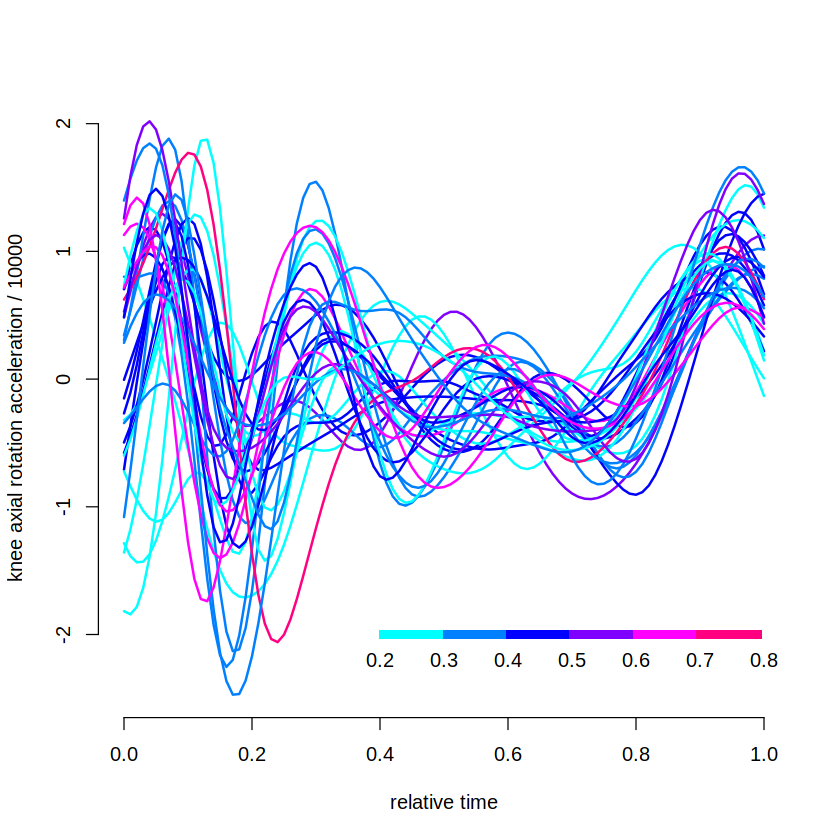

In [2]:
### 3.1 Introduction/Overview ###

# data for the functional linear model

# functional predictor
# make sure that there is only one observation per subject
x <- dta$knee_accl_vt[dta$cond=="slowbw",]
x <- x/10000
tt <- (dta$cycle-1)/100

# scalar response
y <- dta$knee_moment_vt[dta$cond=="slowbw",]
y <- apply(y, 1, max) 

# scalar covariate
sx <- dta$sex[dta$cond=="slowbw"]

# plot the functional data with colors corresponding to y
cx <- rainbow(12)[7:12]
cy <- floor(10*y)-1
matplot(tt,t(x), type="l", lty = 1, col = cx[cy], xlab = "relative time",
        ylab = "knee axial rotation acceleration / 10000", bty = "n", lwd = 2)
points((41:100)/101, rep(-2,60), pch = 15, col = rep(cx,rep(10,6)))
text((4:10)/10, rep(-2.2,7), seq(0.2,0.8,by=0.1), cex = 1)



Family: gaussian 
Link function: identity 

Formula:
y ~ s(x = x.tmat, by = L.x, k = 15, bs = "ps", m = 2) + sx

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.45585    0.06144   7.419 6.19e-08 ***
sxm         -0.05555    0.05695  -0.975    0.338    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df    F p-value
s(x.tmat):L.x 2.453  2.796 3.24   0.114

R-sq.(adj) =  0.165   Deviance explained = 26.1%
-REML = -18.373  Scale est. = 0.017042  n = 31

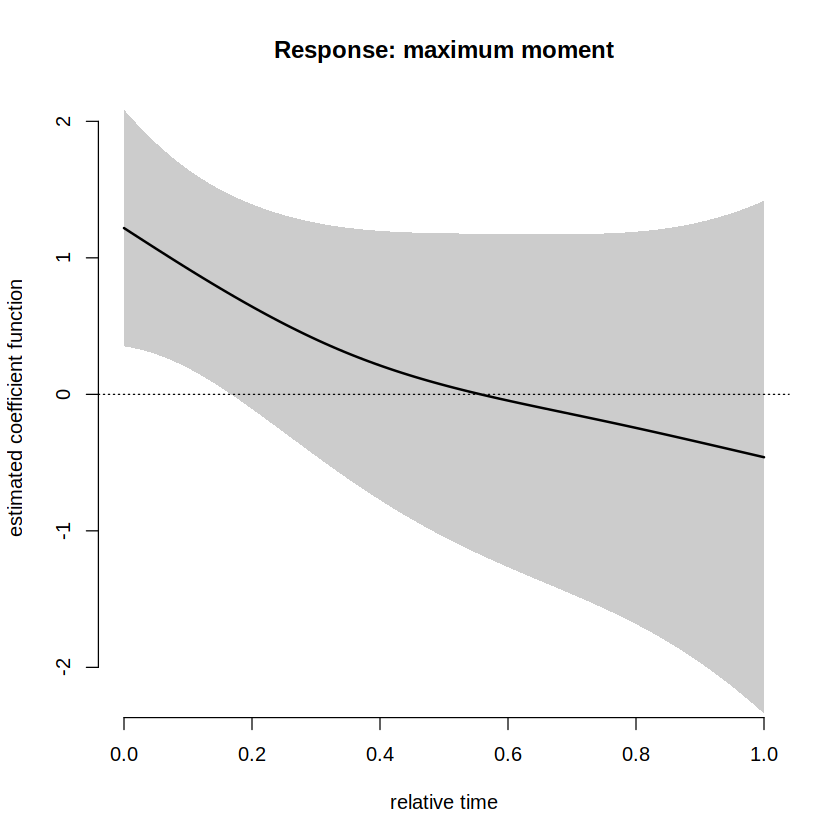

In [3]:
# model fitting
library(refund)
#help("pfr")

# functional linear model
flm1 <- pfr(y ~ lf(x, k = 15, bs = "ps", m=2) + sx, method = "REML")
summary(flm1)


# Figure 6 (left)

# estimated beta function
plot(flm1, rug = FALSE, xlab = "relative time", main = "Response: maximum moment", shade=TRUE,
     ylab = "estimated coefficient function", bty = "n", lwd = 2, ylim = c(-2.2,2))
abline(h = 0, lty=3)

y
 f  m 
16 15 

y
 0  1 
16 15 


Family: binomial 
Link function: logit 

Formula:
y ~ s(x = x.tmat, by = L.x, k = 15, bs = "ps", m = 2)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)    2.635      2.103   1.253     0.21

Approximate significance of smooth terms:
                edf Ref.df Chi.sq p-value
s(x.tmat):L.x 4.371  5.217  8.872   0.117

R-sq.(adj) =  0.606   Deviance explained = 51.7%
-REML = 3.1045  Scale est. = 1         n = 31

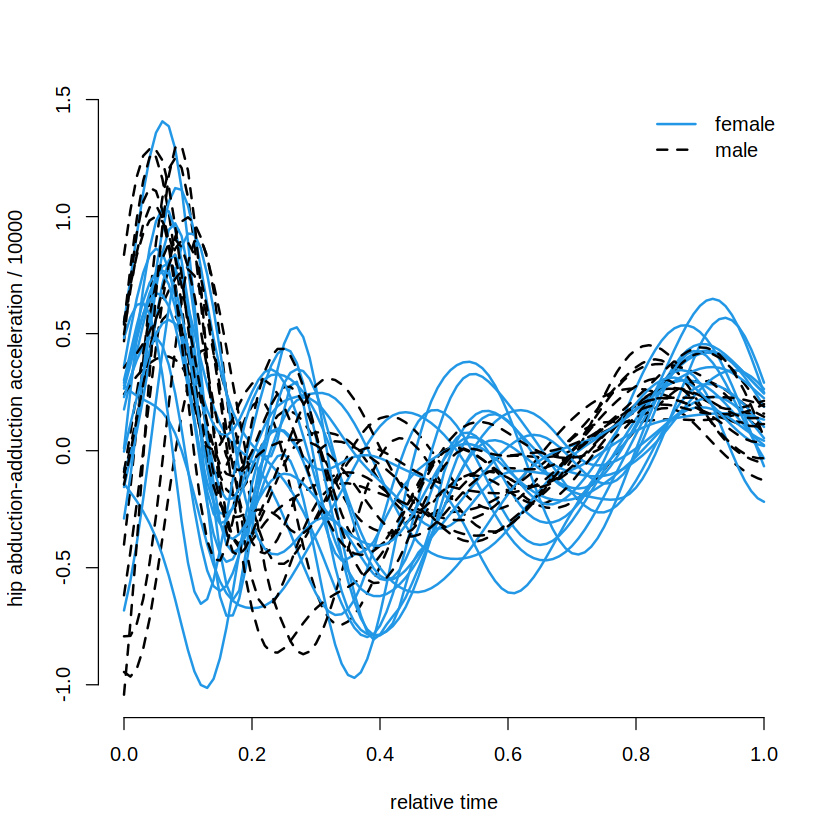

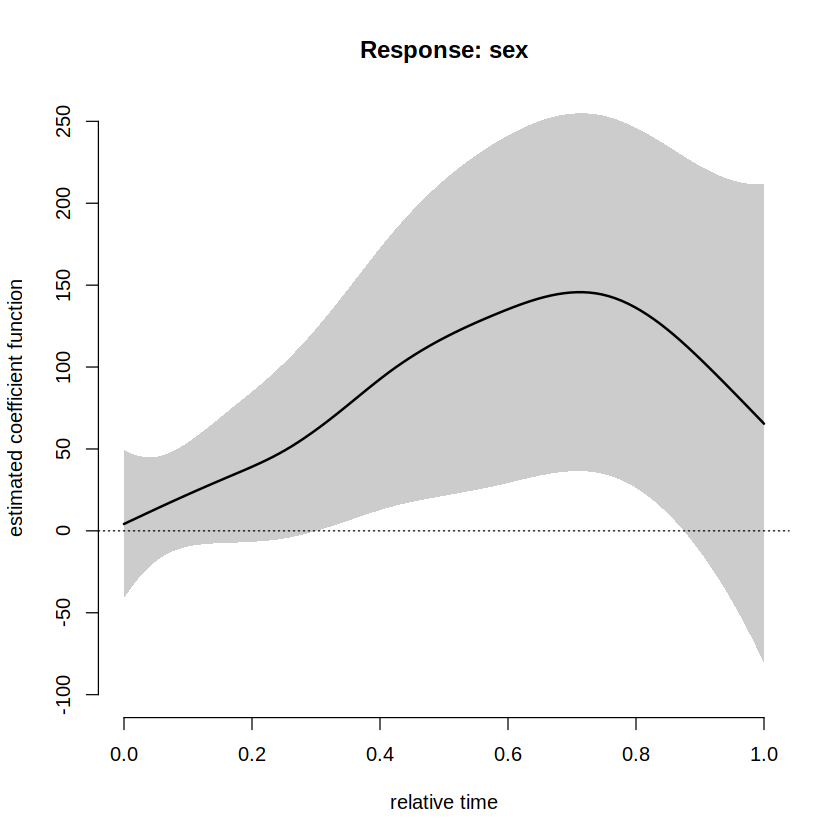

In [4]:
# data for the functional logit model

# change functional predictor
x <- dta$hip_accl_ap[dta$cond=="slowbw",]/10000

# use sex as response
y <- dta$sex[dta$cond=="slowbw"]
table(y)
y <- as.numeric(as.factor(y))-1
table(y)


# plot the functional data with colors corresponding to y
matplot(tt,t(x), type="l", lty = y+1, col = -3*y + 4, xlab = "relative time",
        ylab = "hip abduction-adduction acceleration / 10000", bty = "n", lwd = 2)
legend("topright", legend = c("female","male"), col = c(4,1), lty = 1:2, lwd = 2,
       bty = "n")



# model fitting
flm2 <- pfr(y ~ lf(x, k = 15, bs = "ps", m = 2), family = binomial(link = logit),
            method = "REML")
summary(flm2)



# Figure 6 (right)

# estimated beta
plot(flm2, rug = FALSE, xlab = "relative time", main = "Response: sex", shade=TRUE, 
     ylab = "estimated coefficient function", bty = "n", lwd = 2, ylim = c(-100,250))
abline(h = 0, lty=3)


In [5]:
# function-on-scalar regression

# switch x and y
y <- dta$hip_accl_ap[dta$cond=="slowbw",]/10000
x <- dta$sex[dta$cond=="slowbw"]
table(x)
x <- as.numeric(as.factor(x)) -1
table(x)


# compare pffr manual/examples
# help("pffr")

x
 f  m 
16 15 

x
 0  1 
16 15 

In [6]:
m0 <- pffr(y ~ x, yind=tt)

In [7]:
predictions <- predict(m0)

In [6]:

# compare pffr manual/examples
# help("pffr")

# fit model under independence assumption:
# tt - time points (scaled)
m0 <- pffr(y ~ x, yind=tt)

# get first eigenfunctions of residual covariance 
# (i.e. first functional PCs of empirical residual process
# with 95% variance explained)
# help("fpca.sc")
Ehat <- resid(m0)
fpcE <- fpca.sc(Ehat, nbasis = 20, pve = 0.95)
efunctions <- fpcE$efunctions
evalues <- fpcE$evalues
id <- factor(1:nrow(y))

# refit model with fpc-based residuals
m1 <- pffr(y ~ x + pcre(id=id, efunctions=efunctions, evalues=evalues, yind=tt),
           method = "ML",
           bs.yindex = list(bs="ps", k=20, m=c(2, 1)),
           bs.int = list(bs="ps", k=25, m=c(2, 1)),
           yind=tt)
t1 <- predict(m1, type="terms", se = TRUE)


In [10]:
# Ensure y and predictions are matrices of the same dimension
if (is.matrix(y) && is.matrix(t1) && all(dim(y) == dim(t1))) {
  # Calculate element-wise relative squared error, ignoring zero values in y
  relative_errors <- ((y - t1) / y)^2
  relative_errors[is.na(relative_errors) | is.infinite(relative_errors)] <- 0 # Handle any NaN or Inf from division
  
  # Calculate Mean Squared Prediction Error and then Root Mean Squared Prediction Error
  mspe <- mean(relative_errors)
  rmspe <- sqrt(mspe)
} else {
  stop("y and predictions should be matrices of the same dimension.")
}

rmspe


ERROR: Error in eval(expr, envir, enclos): object 't1' not found


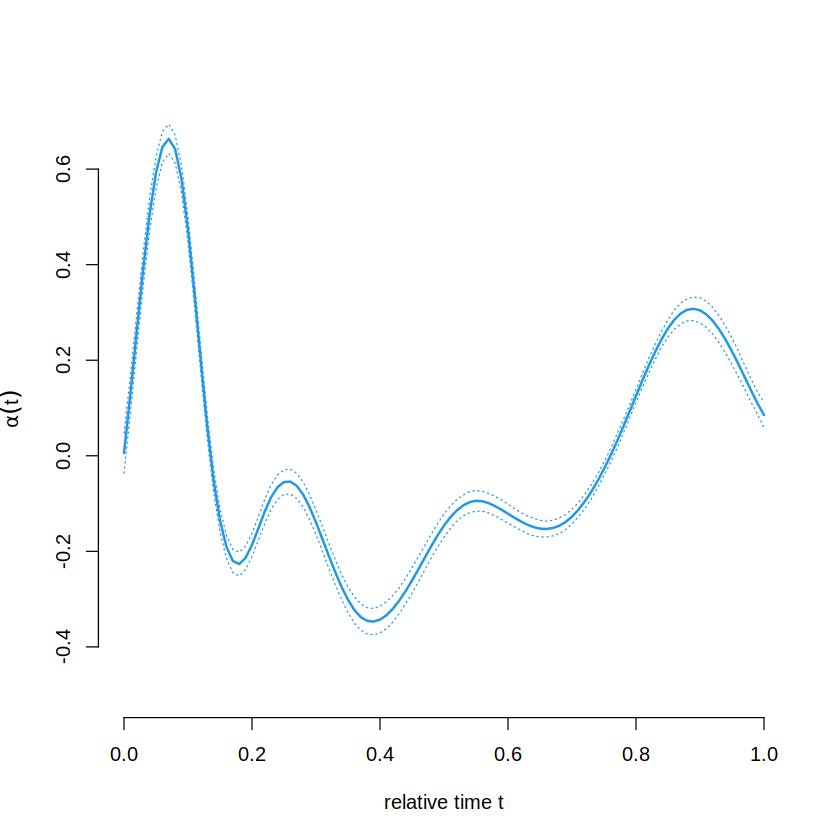

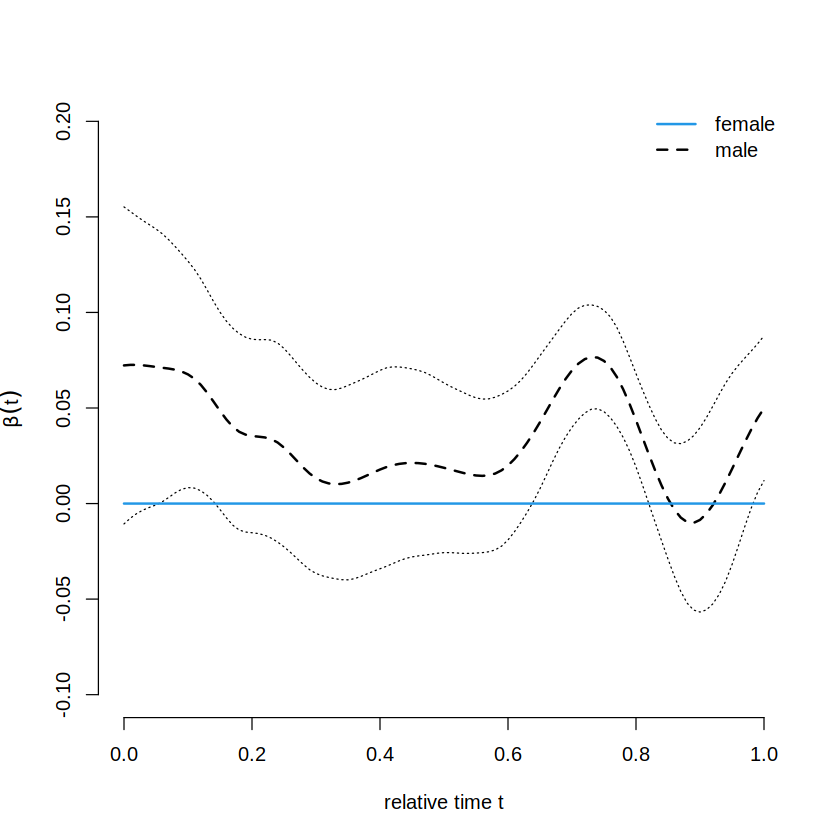

In [8]:
################ FDboost ####################
print("Starting FDboost model...") 
response <- y_train

# Create formula
form <- paste(response, " ~ 1 + ", paste(
  paste0("bsignal(", pred_vars,
         ", cycle)"),
  collapse = " + "),
  " + bbsc(age)",
  " + bbsc(ht)",
  " + bbsc(wt)",
  " + bolsc(sex, df = 2)",
  "+ brandomc(cond)"
)

train <- as.list(train)
train$cycle <- cycle
train[pred_vars] <- lapply(train[pred_vars], function(x) scale(x, scale=F))
test <- as.list(test)
test$cycle <- cycle
test[pred_vars] <- lapply(test[pred_vars], function(x) scale(x, scale=F))

# initialize the model
m <- FDboost(as.formula(form),
             data = train,
             timeformula = ~ bbs(cycle, df = 5),
             control=boost_control(mstop = 1000, nu = 0.1))

set.seed(123)
appl1 <- applyFolds(m, folds = mboost::cv(rep(1, length(unique(m$id))), 
                                          B = 5), 
                    grid = 1:1000)
## plot(appl1)
m[mstop(m)]

prediction_fdboost <- m %>% predict(test)

rm(m, prediction_fdboost); gc()


In [12]:

### 3.2 Semi- and Fully Non-Parametric Approaches ###


# R functions needed for nonparametric FDA
source("https://www.math.univ-toulouse.fr/~ferraty/SOFTWARES/NPFDA/npfda-routinesR.txt")


# the data to use
x <- dta$knee_accl_vt[dta$cond=="slowbw",]
x <- x/10000
tt <- (dta$cycle-1)/100

y <- dta$knee_moment_vt[dta$cond=="slowbw",]
y <- apply(y, 1, max) 


# loo nonparametric regression
n <- length(y)
preds_np <- numeric(n)
for (i in 1:n)
{
  preds_np[i] <- funopare.kernel.cv(y[-i],x[-i,],matrix(x[i,],1,101), q=5,
                                    semimetric = "pca")$Predicted.values
}


# compare to pfr/refund
library(refund)
#help("pfr")
#help("predict.pfr")
preds_pfr <- numeric(n)
for (i in 1:n)
{
  y_i <- y[-i]
  x_i <- x[-i,]
  flmi <- pfr(y_i ~ lf(x_i, k = 15, bs = "ps", m = 2), method = "REML")
  preds_pfr[i] <- predict(flmi, newdata = list("x_i" = matrix(x[i,],1,101)))
}


y
 f  m 
16 15 

y
 0  1 
16 15 

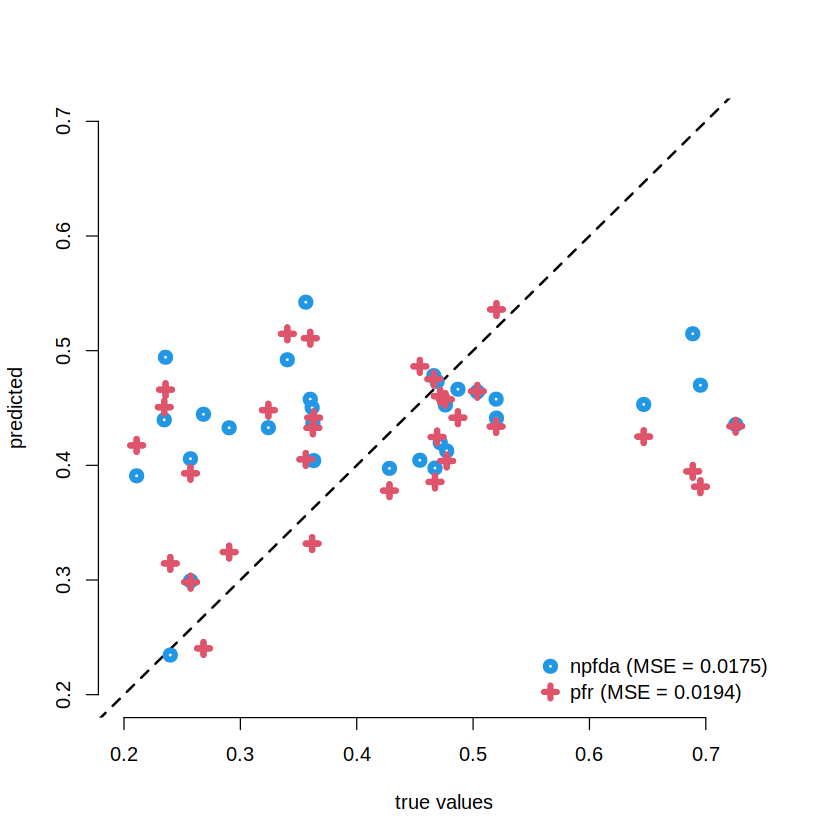

In [13]:

# Figure 8 (left)
plot(y, preds_pfr, lwd = 5, bty = "n", xlab = "true values", ylab="predicted",
     xlim = c(0.2,0.75), ylim = c(0.2,0.7), col = 2, pch = 3)
abline(c(0,1), lty=2, col = 1, lwd = 2)
points(y,preds_np, col = 4, pch = 1, lwd =5)
points(y,preds_pfr, col = 2, pch = 3, lwd =5)
mse_np <- mean((y-preds_np)^2)
mse_pfr <- mean((y-preds_pfr)^2)
legend("bottomright", legend = paste(c("npfda (MSE = ","pfr (MSE = "), round(c(mse_np,mse_pfr), digits = 4), 
                                     c(")", ")"), sep = ""),
       col = c(4,2), pch = c(1,3),
       pt.lwd = 5, bty = "n")




# binary response
x <- dta$hip_accl_ap[dta$cond=="slowbw",]/10000
y <- dta$sex[dta$cond=="slowbw"]
table(y)
y <- as.numeric(as.factor(y))-1
table(y)



Warning message in newton(lsp = lsp, X = G$X, y = G$y, Eb = G$Eb, UrS = G$UrS, L = G$L, :
“Fitting terminated with step failure - check results carefully”
Warning message in newton(lsp = lsp, X = G$X, y = G$y, Eb = G$Eb, UrS = G$UrS, L = G$L, :
“Fitting terminated with step failure - check results carefully”


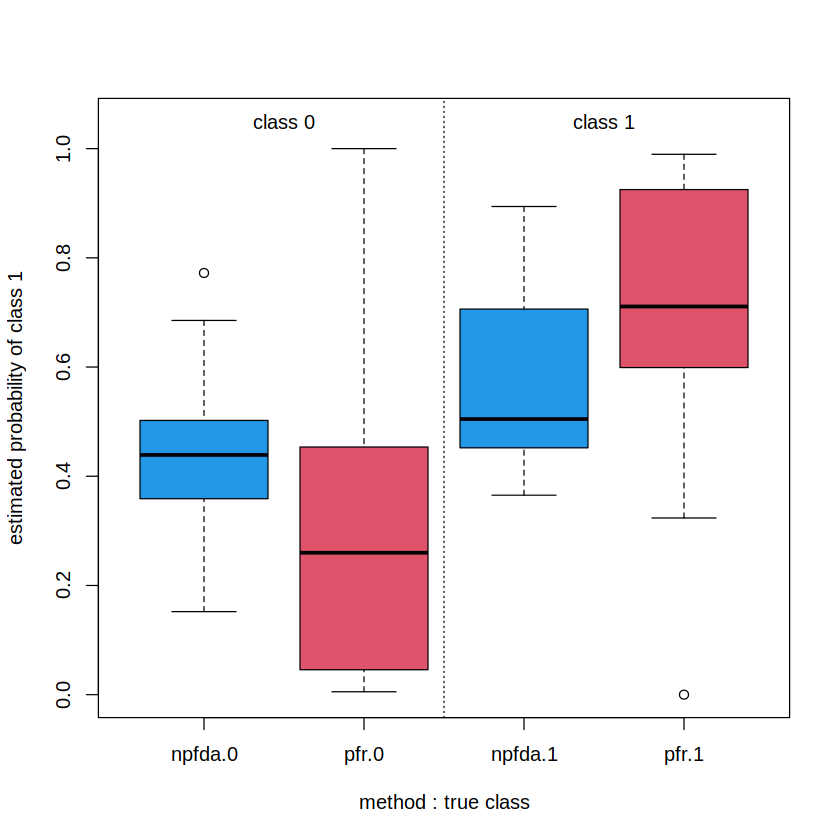

In [14]:

# loo nonparametric regression
n <- length(y)
preds_np <- numeric(n)
for (i in 1:n)
{
  preds_np[i] <- funopare.kernel.cv(y[-i],x[-i,],matrix(x[i,],1,101), q=5,
                                    semimetric = "pca")$Predicted.values
}


# compare to pfr/refund
library(refund)
#help("pfr")
#help("predict.pfr")
preds_pfr <- numeric(n)
for (i in 1:n)
{
  y_i <- y[-i]
  x_i <- x[-i,]
  flmi <- pfr(y_i ~ lf(x_i, k = 15, bs = "ps", m = 2), family = binomial(link = logit),
              method = "REML")
  preds_pfr[i] <- predict(flmi, newdata = list("x_i" = matrix(x[i,],1,101)),
                          type = "response")
}


# Figure 8 (right)
preds <- c(preds_np,preds_pfr)
yy <- c(y,y)
mthd <- rep(c("npfda","pfr"),c(n,n))

boxplot(preds ~ mthd*yy, xlab = "method : true class",
        ylab = "estimated probability of class 1", col = c(4,2), ylim = c(0,1.05))
abline(v=2.5, lty = 3)
text(c(1.5,3.5),c(1.05,1.05), c("class 0","class 1"))

In [15]:
summary(y)
summary(x)

# Check for any missing values
any(is.na(y))
any(is.na(x))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4839  1.0000  1.0000 

       1                  2                  3                 4          
 Min.   :-1.04238   Min.   :-0.96521   Min.   :-0.9314   Min.   :-0.8465  
 1st Qu.:-0.15017   1st Qu.:-0.07082   1st Qu.: 0.1043   1st Qu.: 0.2530  
 Median : 0.17637   Median : 0.25391   Median : 0.3186   Median : 0.4188  
 Mean   : 0.02992   Mean   : 0.15963   Mean   : 0.2913   Mean   : 0.4183  
 3rd Qu.: 0.35826   3rd Qu.: 0.46752   3rd Qu.: 0.5795   3rd Qu.: 0.6667  
 Max.   : 0.83708   Max.   : 1.02727   Max.   : 1.1709   Max.   : 1.2597  
       5                 6                 7                 8          
 Min.   :-0.7179   Min.   :-0.5564   Min.   :-0.4464   Min.   :-0.5347  
 1st Qu.: 0.3822   1st Qu.: 0.4833   1st Qu.: 0.4958   1st Qu.: 0.5735  
 Median : 0.5595   Median : 0.6725   Median : 0.7593   Median : 0.7906  
 Mean   : 0.5310   Mean   : 0.6200   Mean   : 0.6765   Mean   : 0.6936  
 3rd Qu.: 0.7753   3rd Qu.: 0.8768   3rd Qu.: 0.9691   3rd Qu.: 0.9321  
 Max.   : 1.2882   Max.   : 1.3585   

[1] FALSE

[1] FALSE